In [1]:
import pandas as pd
import numpy as np

df_all = pd.read_csv("./data/LinguisticFeatures.csv")

In [2]:
df_all

,PID,Session,Number Areas before prompt,Word count before first prompt,Total word count,# hesitations,# social,# prompts,Complexity score,Complexity UPD,...,Task Performance UPD,# fruits/animals before prompt,# fruits/animals total,# unique fruits/animal total,# repeated,# hesitations.1,# social.1,# prompts,Task Performance,MMSE
0,P02,S1,3,242,600,10,2,4,0.68,0.84,...,NaN,18,38,28,5,14,4,3,NaN,27
1,P02,S2,2,18,384,8,0,1,0.72,0.81,...,NaN,9,27,20,3,12,1,4,NaN,27
2,P02,S3,3,184,402,15,1,3,0.75,0.86,...,NaN,11,39,28,5,16,6,4,NaN,27
3,P02,S4,5,178,453,10,2,4,0.69,0.81,...,NaN,13,41,24,8,9,7,4,NaN,27
4,P02,S5,4,344,415,14,2,3,0.71,0.85,...,NaN,21,42,31,3,11,2,4,NaN,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,P25,S1,4,62,174,5,0,5,0.70,0.89,...,NaN,15,45,29,8,21,3,6,NaN,30
106,P25,S2,5,70,131,6,1,5,0.65,0.86,...,NaN,7,19,10,3,5,1,6,NaN,30
107,P25,S3,4,48,125,4,0,6,0.65,0.90,...,NaN,13,34,23,5,8,2,6,NaN,30
108,P25,S4,5,77,106,1,0,3,0.68,0.86,...,NaN,7,15,11,2,7,2,7,NaN,30


In [3]:
df_all.columns.tolist()

['PID',
 'Session',
 'Number Areas before prompt',
 'Word count before first prompt',
 'Total word count',
 '# hesitations',
 '# social',
 '# prompts',
 'Complexity score',
 'Complexity UPD',
 'Task Performance ',
 'Task Performance UPD',
 '# fruits/animals before prompt ',
 '# fruits/animals total',
 '# unique fruits/animal total',
 '# repeated',
 '# hesitations.1',
 '# social.1',
 '# prompts ',
 'Task Performance',
 'MMSE']

In [4]:
df_all['# fruits/animals before prompt '] = df_all['# fruits/animals before prompt '].astype(float)
df_all['MMSE'] = df_all['MMSE'].astype(float)

In [5]:
df_session = pd.DataFrame(columns=['PID', 'Session', 'Complexity Score', 'Complexity Score UPD', 'Unique Words Before Prompt', 'MMSE'])
df_pid = pd.DataFrame(columns=['PID', 'Picnic Complexity Avg', 'Picnic Complexity UPD Avg', 'Cookie Theft Complexity Avg', 'Cookie Theft Complexity UPD Avg', 'Avg Unique Fruits Before Prompt', 'Avg Unique Animals Before Prompt', 'MMSE'])

In [6]:
for index, row in df_all.iterrows():
    df_session = pd.concat([df_session, pd.DataFrame({'PID': [row['PID']], 'Session': [row['Session']], 'Complexity Score': [row['Complexity score']], 'Complexity Score UPD': [row['Complexity UPD']], 'Unique Words Before Prompt': [row['# fruits/animals before prompt ']], 'MMSE':[row['MMSE']]})], ignore_index=True)

index_pid_map = []
pid_index_map = {}
index = 0
print(df_session['PID'].unique().tolist())
for pid in df_session['PID'].unique().tolist():
    df_pid = pd.concat([df_pid, pd.DataFrame({'PID': [pid], 'Picnic Complexity Avg': [0.0], 'Picnic Complexity UPD Avg': [0.0], 'Cookie Theft Complexity Avg': [0.0], 'Cookie Theft Complexity UPD Avg': [0.0], 'Avg Unique Fruits Before Prompt': [0.0], 'Avg Unique Animals Before Prompt': [0.0], 'MMSE':[0.0]})], ignore_index=True)
    index_pid_map.append(pid)
    pid_index_map[pid] = index
    index += 1
print(df_pid)

for index, row in df_session.iterrows():
    print(row)
    if row['Session'] in ["S1", "S3", "S5"]:
        print(row['Session'])
        # task1 = "Cookie Theft"
        # task2 = "Animals"
        df_pid.at[pid_index_map[row['PID']], 'Cookie Theft Complexity Avg'] += row["Complexity Score"]
        df_pid.at[pid_index_map[row['PID']], 'Cookie Theft Complexity UPD Avg'] += row["Complexity Score UPD"]
        df_pid.at[pid_index_map[row['PID']], 'Avg Unique Animals Before Prompt'] += row["Unique Words Before Prompt"]
    elif row['Session'] in ["S2", "S4"]:
        print(row['Session'])
        # task1 = "Picnic"
        # task2 = "Fruits"
        df_pid.at[pid_index_map[row['PID']], 'Picnic Complexity Avg'] += row["Complexity Score"]
        df_pid.at[pid_index_map[row['PID']], 'Picnic Complexity UPD Avg'] += row["Complexity Score UPD"]
        df_pid.at[pid_index_map[row['PID']], 'Avg Unique Fruits Before Prompt'] += row["Unique Words Before Prompt"]

    df_pid.at[pid_index_map[row['PID']], 'MMSE'] = row["MMSE"]

for index, row in df_pid.iterrows():
    df_pid.at[index, 'Cookie Theft Complexity Avg'] /= 3
    df_pid.at[index, 'Cookie Theft Complexity UPD Avg'] /= 3
    df_pid.at[index, 'Avg Unique Animals Before Prompt'] /= 3
    df_pid.at[index, 'Picnic Complexity Avg'] /= 2
    df_pid.at[index, 'Picnic Complexity UPD Avg'] /= 2
    df_pid.at[index, 'Avg Unique Fruits Before Prompt'] /= 2


['P02', 'P04', 'P05', 'P06', 'P07', 'P08', 'P09', 'P10', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25']
    PID  Picnic Complexity Avg  Picnic Complexity UPD Avg  \
0   P02                    0.0                        0.0   
1   P04                    0.0                        0.0   
2   P05                    0.0                        0.0   
3   P06                    0.0                        0.0   
4   P07                    0.0                        0.0   
5   P08                    0.0                        0.0   
6   P09                    0.0                        0.0   
7   P10                    0.0                        0.0   
8   P12                    0.0                        0.0   
9   P13                    0.0                        0.0   
10  P14                    0.0                        0.0   
11  P15                    0.0                        0.0   
12  P16                    0.0                      

In [7]:
print(df_session)
df_S1 = df_session[df_session["Session"] == "S1"]
df_S2 = df_session[df_session["Session"] == "S2"]
df_S3 = df_session[df_session["Session"] == "S3"]
df_S4 = df_session[df_session["Session"] == "S4"]
df_S5 = df_session[df_session["Session"] == "S5"]

     PID Session  Complexity Score  Complexity Score UPD  \
0    P02      S1              0.68                  0.84   
1    P02      S2              0.72                  0.81   
2    P02      S3              0.75                  0.86   
3    P02      S4              0.69                  0.81   
4    P02      S5              0.71                  0.85   
..   ...     ...               ...                   ...   
105  P25      S1              0.70                  0.89   
106  P25      S2              0.65                  0.86   
107  P25      S3              0.65                  0.90   
108  P25      S4              0.68                  0.86   
109  P25      S5              0.69                  0.88   

     Unique Words Before Prompt  MMSE  
0                          18.0  27.0  
1                           9.0  27.0  
2                          11.0  27.0  
3                          13.0  27.0  
4                          21.0  27.0  
..                          ...   ...  

In [8]:
print(df_pid)

    PID  Picnic Complexity Avg  Picnic Complexity UPD Avg  \
0   P02                  0.705                      0.810   
1   P04                  0.780                      0.800   
2   P05                  0.700                      0.795   
3   P06                  0.725                      0.800   
4   P07                  0.650                      0.800   
5   P08                  0.740                      0.805   
6   P09                  0.720                      0.810   
7   P10                  0.785                      0.810   
8   P12                  0.705                      0.795   
9   P13                  0.590                      0.800   
10  P14                  0.675                      0.800   
11  P15                  0.645                      0.795   
12  P16                  0.580                      0.790   
13  P17                  0.720                      0.855   
14  P18                  0.725                      0.815   
15  P19                 

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt 
from statannotations.Annotator import Annotator
from utils import plotting


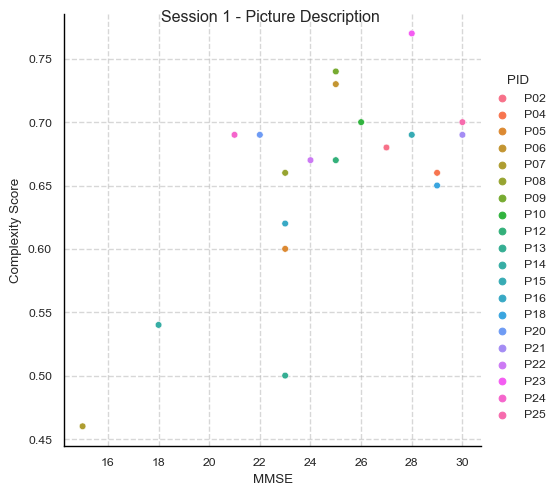

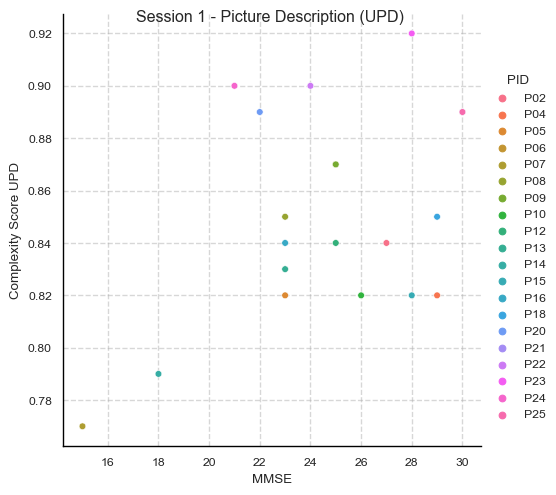

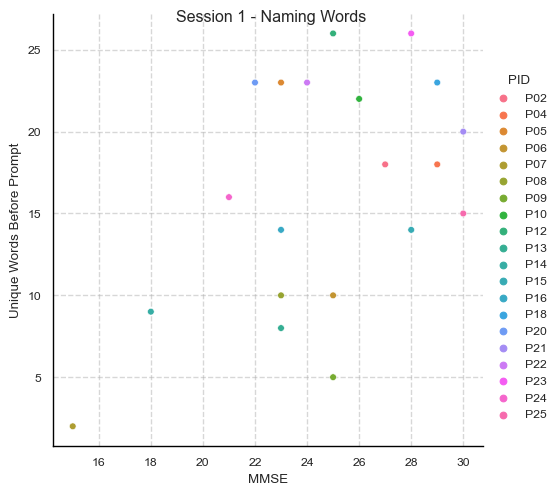

In [10]:
with plotting.paper_theme():
    ax = sns.relplot(
        data=df_S1,
        x="MMSE", y="Complexity Score", hue="PID"
    )
    ax.fig.suptitle("Session 1 - Picture Description")
    ax = sns.relplot(
        data=df_S1,
        x="MMSE", y="Complexity Score UPD", hue="PID"
    )
    ax.fig.suptitle("Session 1 - Picture Description (UPD)")
    ax = sns.relplot(
        data=df_S1,
        x="MMSE", y="Unique Words Before Prompt", hue="PID"
    )
    ax.fig.suptitle("Session 1 - Naming Words")
    plt.show()

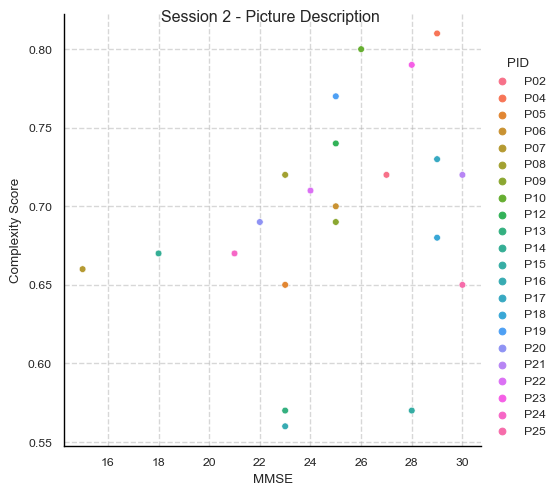

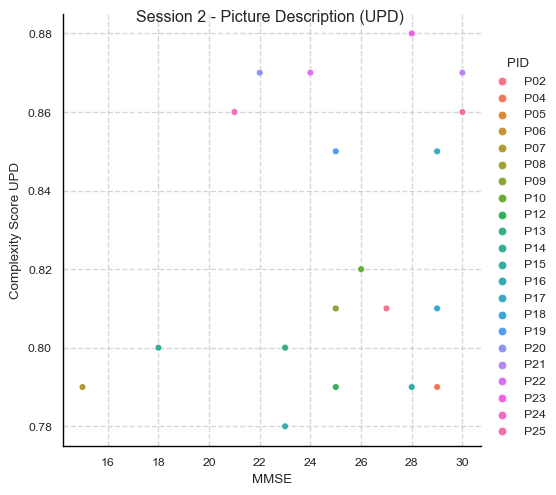

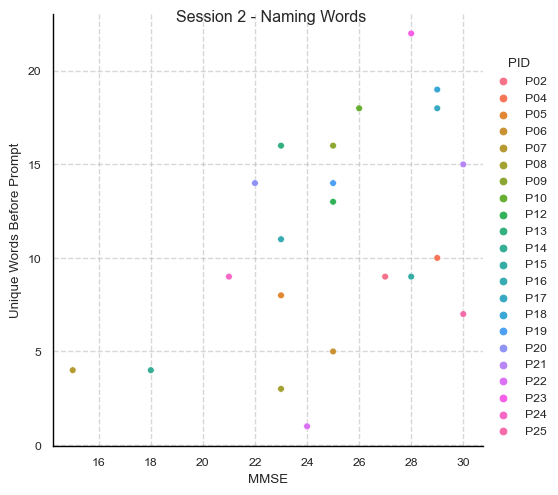

In [11]:
with plotting.paper_theme():
    ax = sns.relplot(
        data=df_S2,
        x="MMSE", y="Complexity Score", hue="PID"
    )
    ax.fig.suptitle("Session 2 - Picture Description")
    ax = sns.relplot(
        data=df_S2,
        x="MMSE", y="Complexity Score UPD", hue="PID"
    )
    ax.fig.suptitle("Session 2 - Picture Description (UPD)")
    ax = sns.relplot(
        data=df_S2,
        x="MMSE", y="Unique Words Before Prompt", hue="PID"
    )
    ax.fig.suptitle("Session 2 - Naming Words")
    plt.show()

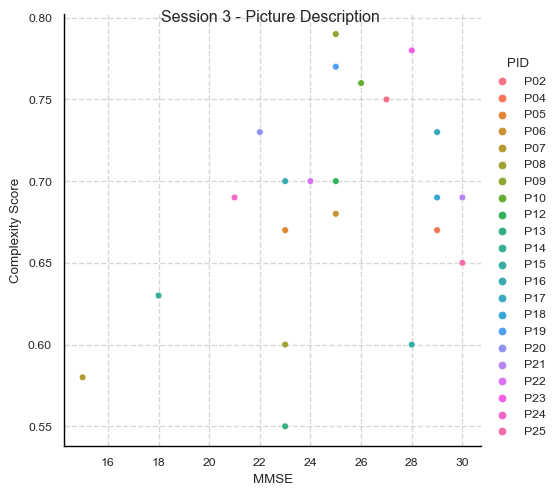

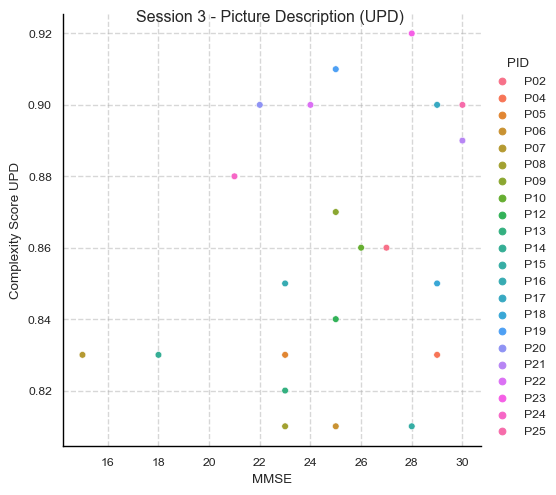

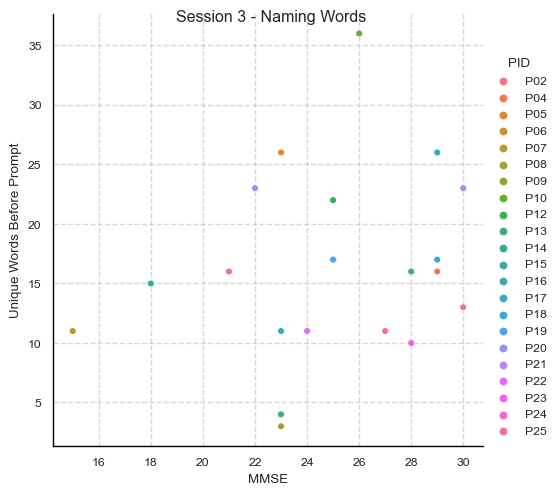

In [12]:
with plotting.paper_theme():
    ax = sns.relplot(
        data=df_S3,
        x="MMSE", y="Complexity Score", hue="PID"
    )
    ax.fig.suptitle("Session 3 - Picture Description")
    ax = sns.relplot(
        data=df_S3,
        x="MMSE", y="Complexity Score UPD", hue="PID"
    )
    ax.fig.suptitle("Session 3 - Picture Description (UPD)")
    ax = sns.relplot(
        data=df_S3,
        x="MMSE", y="Unique Words Before Prompt", hue="PID"
    )
    ax.fig.suptitle("Session 3 - Naming Words")
    plt.show()

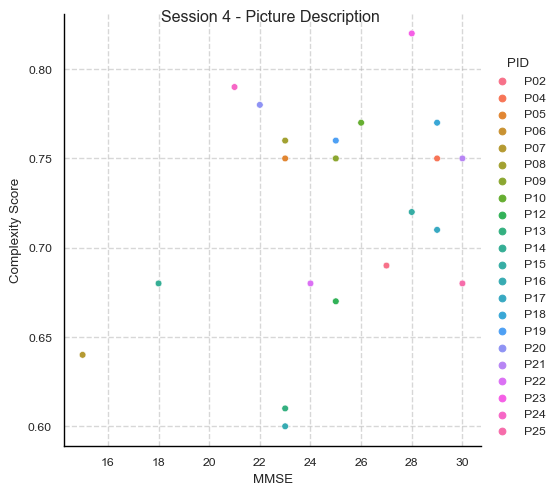

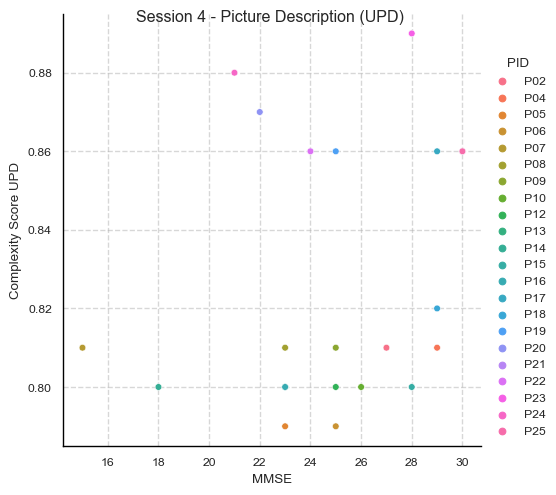

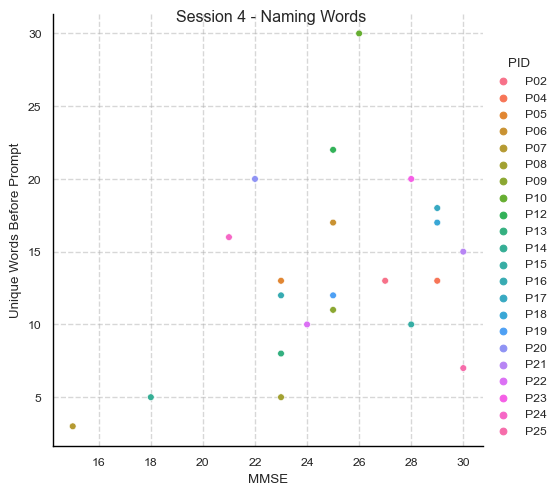

In [13]:
with plotting.paper_theme():
    ax = sns.relplot(
        data=df_S4,
        x="MMSE", y="Complexity Score", hue="PID"
    )
    ax.fig.suptitle("Session 4 - Picture Description")
    ax = sns.relplot(
        data=df_S4,
        x="MMSE", y="Complexity Score UPD", hue="PID"
    )
    ax.fig.suptitle("Session 4 - Picture Description (UPD)")
    ax = sns.relplot(
        data=df_S4,
        x="MMSE", y="Unique Words Before Prompt", hue="PID"
    )
    ax.fig.suptitle("Session 4 - Naming Words")
    plt.show()

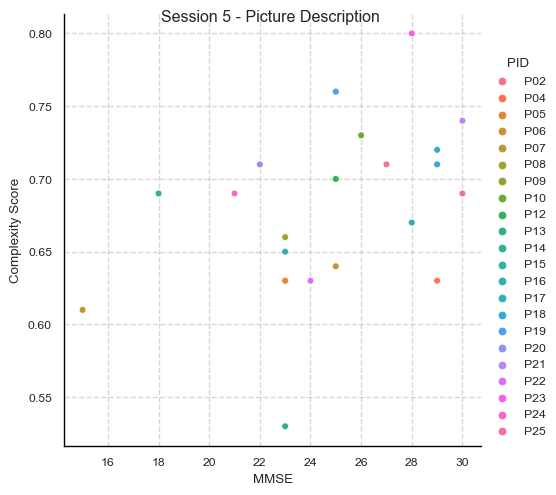

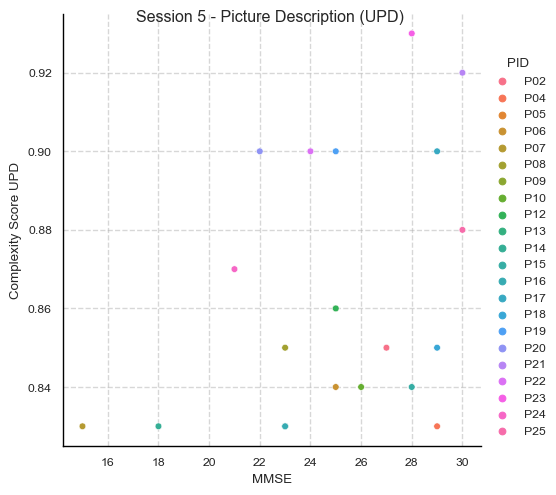

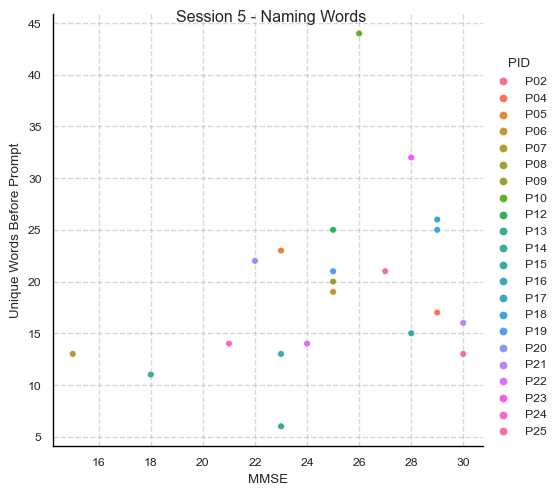

In [14]:
with plotting.paper_theme():
    ax = sns.relplot(
        data=df_S5,
        x="MMSE", y="Complexity Score", hue="PID"
    )
    ax.fig.suptitle("Session 5 - Picture Description")
    ax = sns.relplot(
        data=df_S5,
        x="MMSE", y="Complexity Score UPD", hue="PID"
    )
    ax.fig.suptitle("Session 5 - Picture Description (UPD)")
    ax = sns.relplot(
        data=df_S5,
        x="MMSE", y="Unique Words Before Prompt", hue="PID"
    )
    ax.fig.suptitle("Session 5 - Naming Words")
    plt.show()

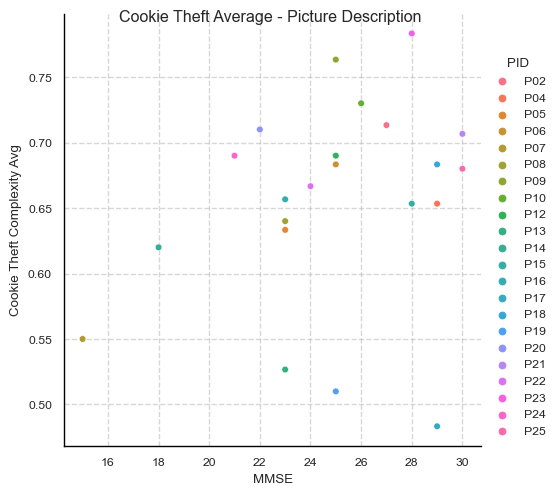

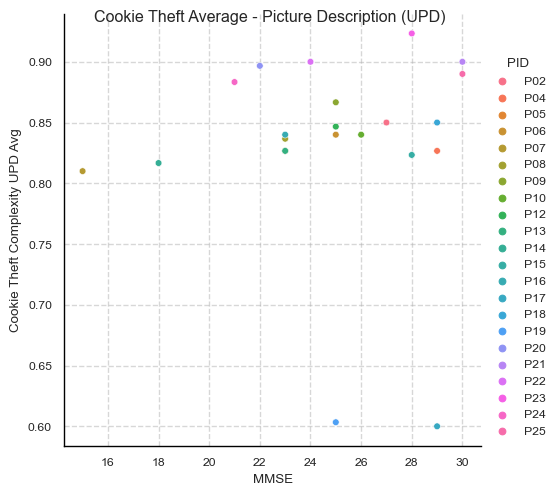

In [15]:
with plotting.paper_theme():
    ax = sns.relplot(
        data=df_pid,
        x="MMSE", y="Cookie Theft Complexity Avg", hue="PID"
    )
    ax.fig.suptitle("Cookie Theft Average - Picture Description")
    ax = sns.relplot(
        data=df_pid,
        x="MMSE", y="Cookie Theft Complexity UPD Avg", hue="PID"
    )
    ax.fig.suptitle("Cookie Theft Average - Picture Description (UPD)")
    plt.show()

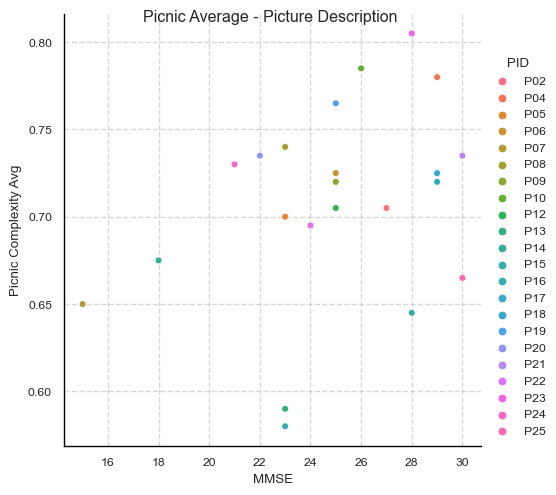

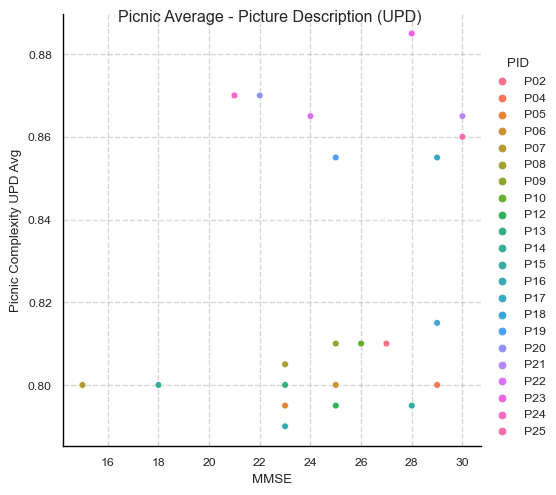

In [16]:
with plotting.paper_theme():
    ax = sns.relplot(
        data=df_pid,
        x="MMSE", y="Picnic Complexity Avg", hue="PID"
    )
    ax.fig.suptitle("Picnic Average - Picture Description")
    ax = sns.relplot(
        data=df_pid,
        x="MMSE", y="Picnic Complexity UPD Avg", hue="PID"
    )
    ax.fig.suptitle("Picnic Average - Picture Description (UPD)")
    plt.show()

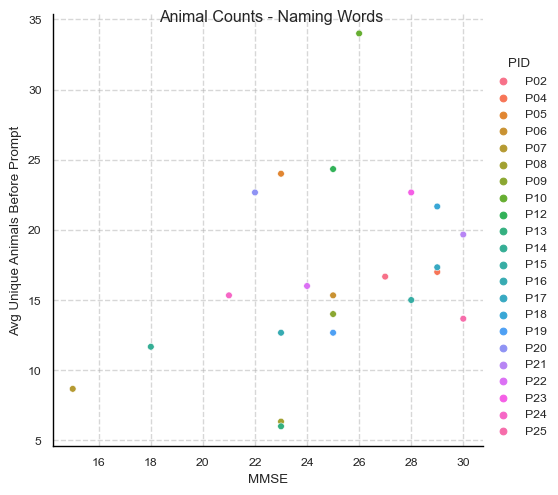

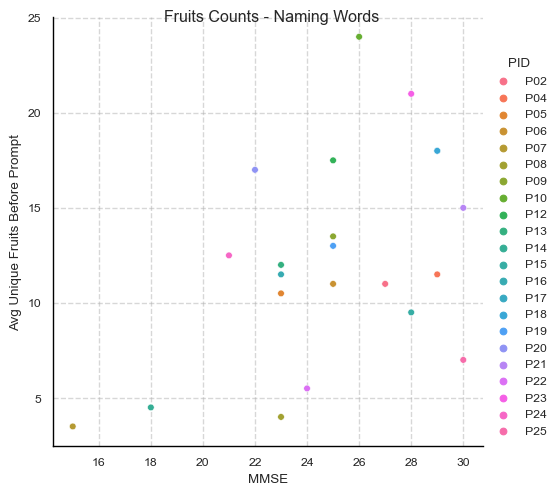

In [17]:
with plotting.paper_theme():
    ax = sns.relplot(
        data=df_pid,
        x="MMSE", y="Avg Unique Animals Before Prompt", hue="PID"
    )
    ax.fig.suptitle("Animal Counts - Naming Words")
    ax = sns.relplot(
        data=df_pid,
        x="MMSE", y="Avg Unique Fruits Before Prompt", hue="PID"
    )
    ax.fig.suptitle("Fruits Counts - Naming Words")
    plt.show()

In [18]:
print("S1: Complexity Score")
print(df_S1["MMSE"].corr(df_S1["Complexity Score"], method='spearman'))
print("S1: Complexity Score UPD")
print(df_S1["MMSE"].corr(df_S1["Complexity Score UPD"], method='spearman'))
print("S1: Unique Words Before Prompt")
print(df_S1["MMSE"].corr(df_S1["Unique Words Before Prompt"], method='spearman'))

print("S2: Complexity Score")
print(df_S2["MMSE"].corr(df_S2["Complexity Score"], method='spearman'))
print("S2: Complexity Score UPD")
print(df_S2["MMSE"].corr(df_S2["Complexity Score UPD"], method='spearman'))
print("S2: Unique Words Before Prompt")
print(df_S2["MMSE"].corr(df_S2["Unique Words Before Prompt"], method='spearman'))

print("S3: Complexity Score")
print(df_S3["MMSE"].corr(df_S3["Complexity Score"], method='spearman'))
print("S3: Complexity Score UPD")
print(df_S3["MMSE"].corr(df_S3["Complexity Score UPD"], method='spearman'))
print("S3: Unique Words Before Prompt")
print(df_S3["MMSE"].corr(df_S3["Unique Words Before Prompt"], method='spearman'))

print("S4: Complexity Score")
print(df_S4["MMSE"].corr(df_S4["Complexity Score"], method='spearman'))
print("S4: Complexity Score UPD")
print(df_S4["MMSE"].corr(df_S4["Complexity Score UPD"], method='spearman'))
print("S4: Unique Words Before Prompt")
print(df_S4["MMSE"].corr(df_S4["Unique Words Before Prompt"], method='spearman'))

print("S5: Complexity Score")
print(df_S5["MMSE"].corr(df_S5["Complexity Score"], method='spearman'))
print("S5: Complexity Score UPD")
print(df_S5["MMSE"].corr(df_S5["Complexity Score UPD"], method='spearman'))
print("S5: Unique Words Before Prompt")
print(df_S5["MMSE"].corr(df_S5["Unique Words Before Prompt"], method='spearman'))


S1: Complexity Score
0.49087509245514765
S1: Complexity Score UPD
0.24141904523094285
S1: Unique Words Before Prompt
0.36097398930058444
S2: Complexity Score
0.3970975878422754
S2: Complexity Score UPD
0.26695512516381065
S2: Unique Words Before Prompt
0.4461290200812354
S3: Complexity Score
0.24508070367829193
S3: Complexity Score UPD
0.28510028653295133
S3: Unique Words Before Prompt
0.25214899713467054
S4: Complexity Score
0.1530085959885387
S4: Complexity Score UPD
0.21920920311465106
S4: Unique Words Before Prompt
0.32677886069262446
S5: Complexity Score
0.435058662460728
S5: Complexity Score UPD
0.3882276023907775
S5: Unique Words Before Prompt
0.4201879716292275


In [19]:
print("Cookie Theft Complexity Score Avg")
print(df_pid["MMSE"].corr(df_pid["Cookie Theft Complexity Avg"], method='spearman'))
print("Cookie Theft Complexity Score UPD Avg")
print(df_pid["MMSE"].corr(df_pid["Cookie Theft Complexity UPD Avg"], method='spearman'))
print("Picnic Complexity Score Avg")
print(df_pid["MMSE"].corr(df_pid["Picnic Complexity Avg"], method='spearman'))
print("Picnic Complexity Score UPD Avg")
print(df_pid["MMSE"].corr(df_pid["Picnic Complexity UPD Avg"], method='spearman'))
print("Unique Animals Before Prompt")
print(df_pid["MMSE"].corr(df_pid["Avg Unique Animals Before Prompt"], method='spearman'))
print("Unique Fruits Before Prompt")
print(df_pid["MMSE"].corr(df_pid["Avg Unique Fruits Before Prompt"], method='spearman'))




Cookie Theft Complexity Score Avg
0.24837043572599893
Cookie Theft Complexity Score UPD Avg
0.21591782172010235
Picnic Complexity Score Avg
0.28742844544722596
Picnic Complexity Score UPD Avg
0.23701602586216788
Unique Animals Before Prompt
0.39055775863973585
Unique Fruits Before Prompt
0.40592956546666425


C:\Users\zhoux\AppData\Local\Temp\ipykernel_26000\1908548971.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax=sns.heatmap(df_S1.corr())


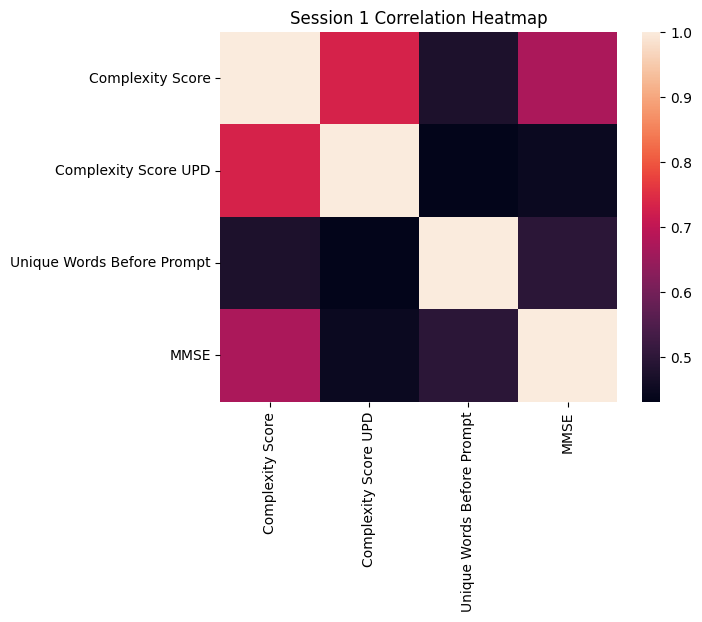

In [20]:
ax=sns.heatmap(df_S1.corr()) 
ax.set_title("Session 1 Correlation Heatmap")
plt.show()

C:\Users\zhoux\AppData\Local\Temp\ipykernel_26000\1479784859.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax=sns.heatmap(df_S2.corr())


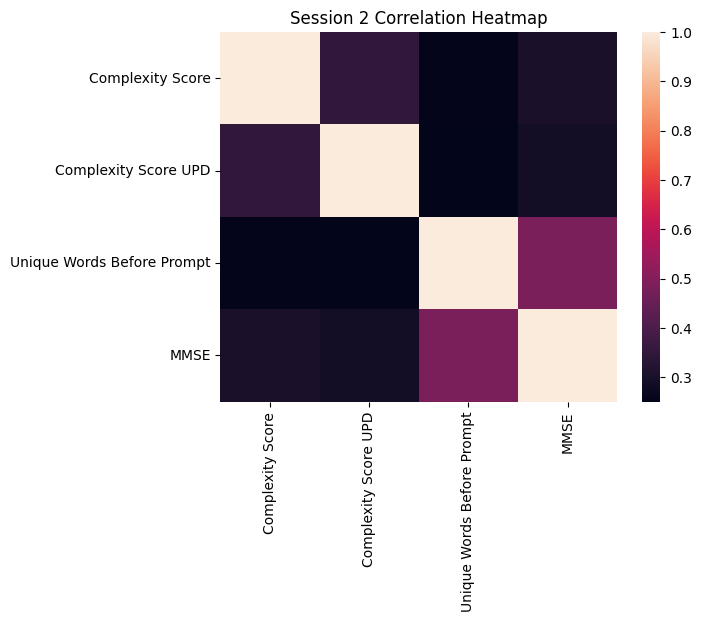

In [21]:
ax=sns.heatmap(df_S2.corr()) 
ax.set_title("Session 2 Correlation Heatmap")
plt.show()

C:\Users\zhoux\AppData\Local\Temp\ipykernel_26000\239939702.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax=sns.heatmap(df_S3.corr())


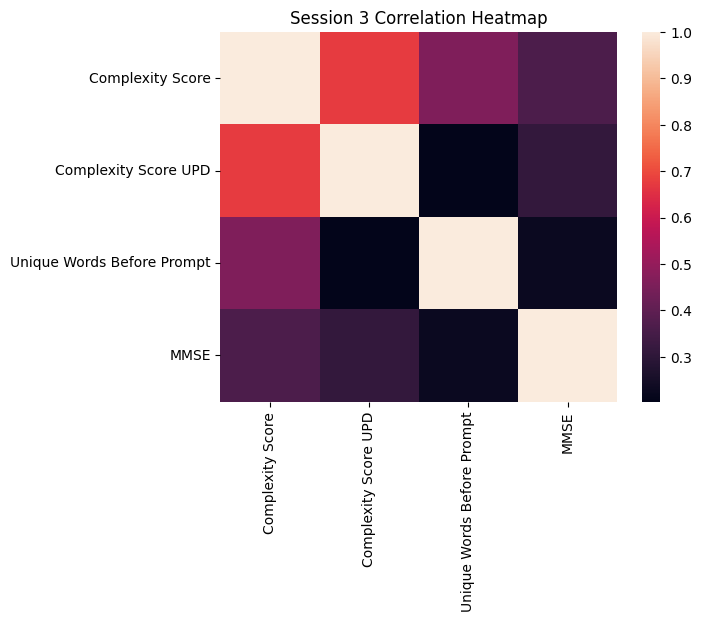

In [22]:
ax=sns.heatmap(df_S3.corr()) 
ax.set_title("Session 3 Correlation Heatmap")
plt.show()

C:\Users\zhoux\AppData\Local\Temp\ipykernel_26000\3552856514.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax=sns.heatmap(df_S4.corr())


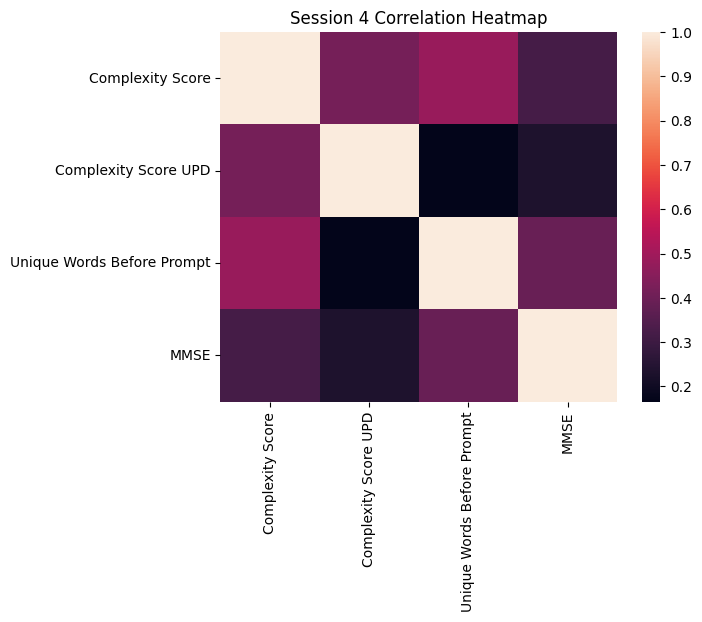

In [23]:
ax=sns.heatmap(df_S4.corr()) 
ax.set_title("Session 4 Correlation Heatmap")
plt.show()

C:\Users\zhoux\AppData\Local\Temp\ipykernel_26000\1722404620.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax=sns.heatmap(df_S5.corr())


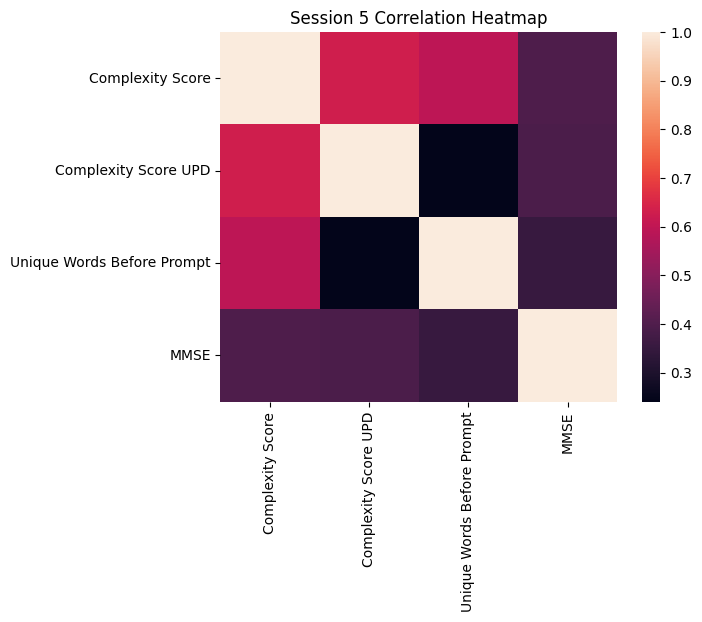

In [24]:
ax=sns.heatmap(df_S5.corr()) 
ax.set_title("Session 5 Correlation Heatmap")
plt.show()

C:\Users\zhoux\AppData\Local\Temp\ipykernel_26000\2737138908.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax=sns.heatmap(df_pid.corr())


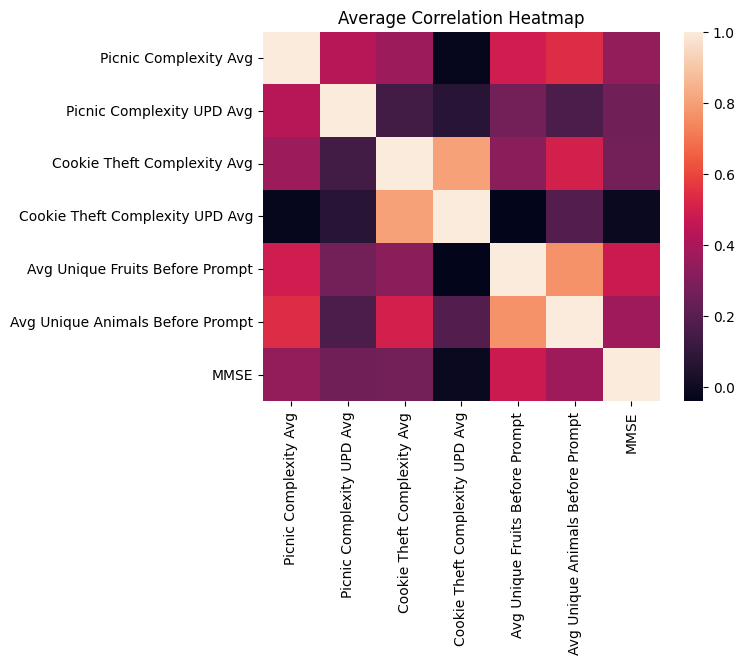

In [25]:
ax=sns.heatmap(df_pid.corr()) 
ax.set_title("Average Correlation Heatmap")
plt.show()

In [28]:
import scipy.stats

print("S1: Complexity Score")
print(scipy.stats.spearmanr(df_S1["MMSE"],df_S1["Complexity Score"]))
print("S1: Complexity Score UPD")
print(scipy.stats.spearmanr(df_S1["MMSE"],df_S1["Complexity Score UPD"]))
print("S1: Unique Words Before Prompt")
print(scipy.stats.spearmanr(df_S1["MMSE"],df_S1["Unique Words Before Prompt"]))

print("S2: Complexity Score")
print(scipy.stats.spearmanr(df_S2["MMSE"],df_S2["Complexity Score"]))
print("S2: Complexity Score UPD")
print(scipy.stats.spearmanr(df_S2["MMSE"],df_S2["Complexity Score UPD"]))
print("S2: Unique Words Before Prompt")
print(scipy.stats.spearmanr(df_S2["MMSE"],df_S2["Unique Words Before Prompt"]))

print("S3: Complexity Score")
print(scipy.stats.spearmanr(df_S3["MMSE"],df_S3["Complexity Score"]))
print("S3: Complexity Score UPD")
print(scipy.stats.spearmanr(df_S3["MMSE"],df_S3["Complexity Score UPD"]))
print("S3: Unique Words Before Prompt")
print(scipy.stats.spearmanr(df_S3["MMSE"],df_S3["Unique Words Before Prompt"]))

print("S4: Complexity Score")
print(scipy.stats.spearmanr(df_S4["MMSE"],df_S4["Complexity Score"]))
print("S4: Complexity Score UPD")
print(scipy.stats.spearmanr(df_S4["MMSE"],df_S4["Complexity Score UPD"]))
print("S4: Unique Words Before Prompt")
print(scipy.stats.spearmanr(df_S4["MMSE"],df_S4["Unique Words Before Prompt"]))

print("S5: Complexity Score")
print(scipy.stats.spearmanr(df_S5["MMSE"],df_S5["Complexity Score"]))
print("S5: Complexity Score UPD")
print(scipy.stats.spearmanr(df_S5["MMSE"],df_S5["Complexity Score UPD"]))
print("S5: Unique Words Before Prompt")
print(scipy.stats.spearmanr(df_S5["MMSE"],df_S5["Unique Words Before Prompt"]))


S1: Complexity Score
SignificanceResult(statistic=0.49087509245514765, pvalue=0.02797107153536941)
S1: Complexity Score UPD
SignificanceResult(statistic=0.24141904523094285, pvalue=0.30517007654713013)
S1: Unique Words Before Prompt
SignificanceResult(statistic=0.36097398930058444, pvalue=0.11790197069762733)
S2: Complexity Score
SignificanceResult(statistic=0.3970975878422754, pvalue=0.06726295089240775)
S2: Complexity Score UPD
SignificanceResult(statistic=0.26695512516381065, pvalue=0.22975584812015)
S2: Unique Words Before Prompt
SignificanceResult(statistic=0.4461290200812354, pvalue=0.03742062632046944)
S3: Complexity Score
SignificanceResult(statistic=0.24508070367829193, pvalue=0.2716362052825166)
S3: Complexity Score UPD
SignificanceResult(statistic=0.28510028653295133, pvalue=0.19841830096049987)
S3: Unique Words Before Prompt
SignificanceResult(statistic=0.25214899713467054, pvalue=0.25760922865589087)
S4: Complexity Score
SignificanceResult(statistic=0.1530085959885387, pva